# Compare the results from different `kissim` runs

Compare results (kinase matrices) from different runs:

- `matrix1`: **Run on 20210701**; based on KLIFS dataset from 20210630
- `matrix2`: **Run on 20210508**; based on KLIFS dataset from 20210114; includes charged-THR bug

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = HERE / "../../results/"
RESULTS_ARCHIVE = HERE / "../../results_archive/"

In [3]:
matrix1 = pd.read_csv(RESULTS / "fingerprint_distances_to_kinase_matrix.csv", index_col=0)
matrix2 = pd.read_csv(RESULTS_ARCHIVE / "20210508/fingerprint_distances_to_kinase_matrix.csv", index_col=0)
print(matrix1.shape)
print(matrix2.shape)

(292, 292)
(292, 292)


In [4]:
kinase_names = sorted(set(matrix1.columns) & set(matrix2.columns))
len(kinase_names)

291

In [5]:
matrix1 = matrix1.loc[kinase_names, kinase_names]
matrix2 = matrix2.loc[kinase_names, kinase_names]
print(matrix1.shape)
print(matrix2.shape)

(291, 291)
(291, 291)


## Compare matrices

### Distribution

In [6]:
matrix1.max().max(), matrix1.min().min()

(1.089961469397803, 0.0)

In [7]:
matrix2.max().max(), matrix2.min().min()

(1.094769161705495, 0.0)

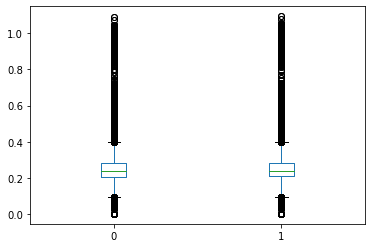

In [8]:
pd.concat([matrix1.unstack(), matrix2.unstack()], axis=1).plot(kind="box");

### Difference

In [9]:
matrix_diff = matrix1 - matrix2

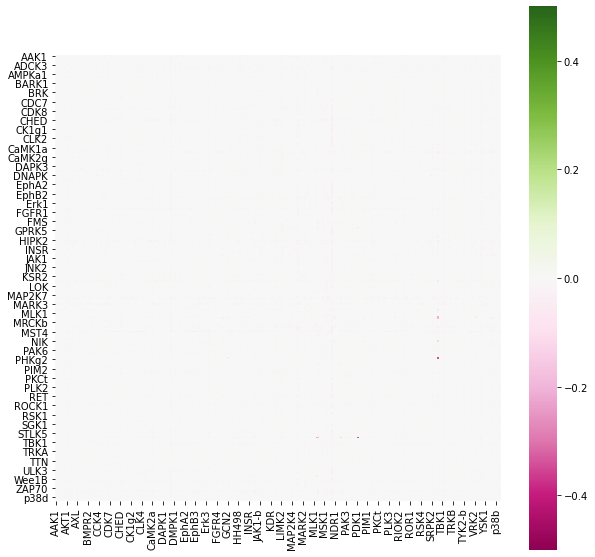

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(matrix_diff, ax=ax, square=True, center=0, cmap="PiYG", vmin=-0.5, vmax=0.5);

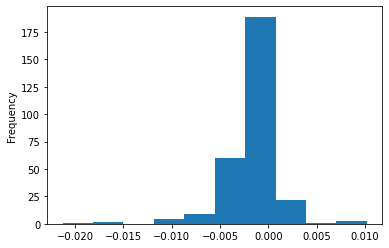

In [11]:
matrix_diff["LOK"].plot(kind="hist");

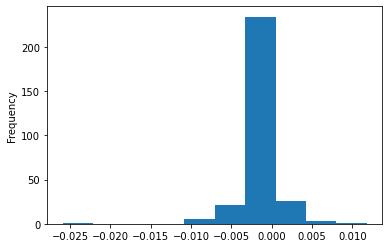

In [12]:
matrix_diff["SLK"].plot(kind="hist");

In [13]:
pair_diff = matrix_diff.unstack()
pair_diff[pair_diff.apply(lambda x: (-0.01 > x) | (x > 0.01))]

AAK1    DDR2     -0.010674
        HPK1     -0.013242
        LIMK2     0.016053
        MER       0.016900
ABL1    ACTR2B   -0.010060
                    ...   
p70S6K  DDR2     -0.014227
        HPK1     -0.014247
        LKB1      0.010188
        MST4     -0.019898
        TGFbR1   -0.012406
Length: 3772, dtype: float64

### Correlation

Correlation of colums between both matrices.

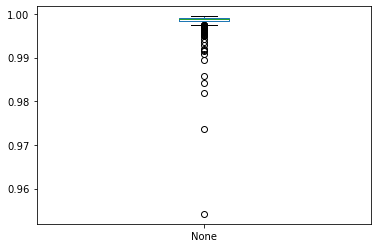

In [14]:
matrix1.corrwith(matrix2, axis=0).plot(kind="box");